In [1]:
import tensorflow as tf
import numpy as np

In [4]:
import tensorflow_datasets as tfds

dataset, info = tfds.load('oxford_iiit_pet:3.2.0', with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteIW82ZS/oxford_iiit_pet-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteIW82ZS/oxford_iiit_pet-test.tfrecord


Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.


In [7]:
dataset

{'test': <PrefetchDataset shapes: {file_name: (), image: (None, None, 3), label: (), segmentation_mask: (None, None, 1), species: ()}, types: {file_name: tf.string, image: tf.uint8, label: tf.int64, segmentation_mask: tf.uint8, species: tf.int64}>,
 'train': <PrefetchDataset shapes: {file_name: (), image: (None, None, 3), label: (), segmentation_mask: (None, None, 1), species: ()}, types: {file_name: tf.string, image: tf.uint8, label: tf.int64, segmentation_mask: tf.uint8, species: tf.int64}>}

In [5]:
info

tfds.core.DatasetInfo(
    name='oxford_iiit_pet',
    version=3.2.0,
    description='The Oxford-IIIT pet dataset is a 37 category pet image dataset with roughly 200
images for each class. The images have large variations in scale, pose and
lighting. All images have an associated ground truth annotation of breed.',
    homepage='http://www.robots.ox.ac.uk/~vgg/data/pets/',
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=37),
        'segmentation_mask': Image(shape=(None, None, 1), dtype=tf.uint8),
        'species': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=7349,
    splits={
        'test': 3669,
        'train': 3680,
    },
    supervised_keys=('image', 'label'),
    citation="""@InProceedings{parkhi12a,
      author       = "Parkhi, O. M. and Vedaldi, A. and Zisserman, A. and Ja

In [6]:
train_data_len = info.splits['train'].num_examples
test_data_len = info.splits['test'].num_examples

In [18]:
def load_image(datapoint):
  img = tf.image.resize(datapoint['image'], (128, 128))
  mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))
  img = tf.cast(img, tf.float32)
  img = img / 255.0
  mask = mask - 1
  return img, mask

In [19]:
train_dataset = dataset['train'].map(load_image)
train_dataset = train_dataset.repeat()
train_dataset = train_dataset.batch(16)

test_dataset = dataset['test'].map(load_image)
test_dataset = test_dataset.repeat()
test_dataset = test_dataset.batch(1)

In [22]:
dataset['train']

<PrefetchDataset shapes: {file_name: (), image: (None, None, 3), label: (), segmentation_mask: (None, None, 1), species: ()}, types: {file_name: tf.string, image: tf.uint8, label: tf.int64, segmentation_mask: tf.uint8, species: tf.int64}>

In [24]:
print(train_dataset)
print(test_dataset)

<BatchDataset shapes: ((None, 128, 128, 3), (None, 128, 128, 1)), types: (tf.float32, tf.float32)>
<BatchDataset shapes: ((None, 128, 128, 3), (None, 128, 128, 1)), types: (tf.float32, tf.float32)>


0.3996089 0.00047392002


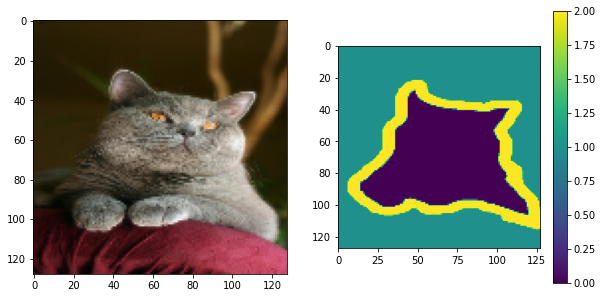

In [25]:
import matplotlib.pyplot as plt

for img, mask in train_dataset.take(1):
  plt.figure(figsize=(10,5))

  plt.subplot(1,2,1)
  plt.imshow(img[2])

  plt.subplot(1,2,2)
  plt.imshow(np.squeeze(mask[2], axis=2))
  plt.colorbar()

  print(np.amax(img[1][2]), np.amin(img[1][2]))

In [28]:
print(len(mask[2]), mask[2].shape)
print(mask[2])

128 (128, 128, 1)
tf.Tensor(
[[[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]

 ...

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]], shape=(128, 128, 1), dtype=float32)


In [33]:
a = np.squeeze(mask[2], axis=2)
print(len(a), a.shape)
print(a)

128 (128, 128)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [34]:
np.amax(img[1])

1.0

In [35]:
np.amax(img[1][2])

0.3996089

In [36]:
np.amax(img)

1.0

In [38]:
img.shape

TensorShape([16, 128, 128, 3])

In [39]:
img

<tf.Tensor: shape=(16, 128, 128, 3), dtype=float32, numpy=
array([[[[1.96078438e-02, 1.27364816e-02, 1.37427235e-02],
         [2.14815028e-02, 1.61860455e-02, 1.24645755e-02],
         [1.38547411e-02, 1.74086634e-02, 1.56317018e-02],
         ...,
         [8.84842221e-03, 3.08861816e-03, 5.96852042e-03],
         [8.24620854e-03, 8.24620854e-03, 4.59558843e-03],
         [2.74509806e-02, 1.17647061e-02, 1.21323531e-02]],

        [[1.47154564e-02, 1.59926470e-02, 1.03295418e-02],
         [1.43832341e-02, 1.43832341e-02, 1.53961778e-02],
         [1.58289298e-02, 1.21390549e-02, 1.39839919e-02],
         ...,
         [6.65881578e-03, 2.74394918e-03, 3.77891399e-03],
         [7.95323960e-03, 7.95323960e-03, 1.01294427e-03],
         [1.20002301e-02, 1.20002301e-02, 1.48188574e-02]],

        [[1.03620943e-02, 1.72612201e-02, 1.38116572e-02],
         [1.33166742e-02, 1.33166742e-02, 1.33166742e-02],
         [1.38796335e-02, 1.96394380e-02, 1.46762021e-02],
         ...,
         [

In [46]:
def REDNet_segmentation(num_layers):
  conv_layers=[]
  deconv_layers=[]
  residual_layers=[]

  inputs = tf.keras.layers.Input(shape=(None, None, 3))
  conv_layers.append(tf.keras.layers.Conv2D(3, kernel_size=3, padding = 'same', activation ='relu'))
  
  for i in range(num_layers - 1):
  
    conv_layers.append(tf.keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'))
    deconv_layers.append(tf.keras.layers.Conv2DTranspose(64, kernel_size=3, padding='same', activation='relu'))

  deconv_layers.append(tf.keras.layers.Conv2DTranspose(3, kernel_size=3, padding='same', activation='softmax'))

  x = conv_layers[0](inputs)

  for i in range(num_layers - 1):
    x = conv_layers[i+1](x)
    if i % 2 == 0:
      residual_layers.append(x)

  for i in range(num_layers - 1):
    if i % 2 == 1:
      x = tf.keras.layers.Add()([x, residual_layers.pop()])
      x = tf.keras.layers.Activation('relu')(x)
    x = deconv_layers[i](x)

  x = deconv_layers[-1](x)

  model = tf.keras.Model(inputs = inputs, outputs= x)
  return model


In [47]:
model = REDNet_segmentation(15)
model.compile(loss='sparse_categorical_crossentropy', optimizer = tf.optimizers.Adam(0.0001), metrics=['accuracy'])

In [48]:
%%time

Hist = model.fit(train_dataset, epochs=10, steps_per_epoch = train_data_len // 16, validation_data = test_dataset, validation_steps = test_data_len)

Epoch 1/10
230/230 [==============================] - 159s 542ms/step - loss: 0.9348 - accuracy: 0.5522 - val_loss: 0.8356 - val_accuracy: 0.5864
Epoch 2/10
230/230 [==============================] - 129s 561ms/step - loss: 0.7633 - accuracy: 0.6444 - val_loss: 0.7546 - val_accuracy: 0.6687
Epoch 3/10
230/230 [==============================] - 131s 568ms/step - loss: 0.6998 - accuracy: 0.6883 - val_loss: 0.7240 - val_accuracy: 0.6779
Epoch 4/10
230/230 [==============================] - 131s 571ms/step - loss: 0.6504 - accuracy: 0.7153 - val_loss: 0.6842 - val_accuracy: 0.6964
Epoch 5/10
230/230 [==============================] - 132s 573ms/step - loss: 0.6082 - accuracy: 0.7380 - val_loss: 0.6068 - val_accuracy: 0.7416
Epoch 6/10
230/230 [==============================] - 131s 570ms/step - loss: 0.5758 - accuracy: 0.7550 - val_loss: 0.5619 - val_accuracy: 0.7629
Epoch 7/10
230/230 [==============================] - 132s 574ms/step - loss: 0.5526 - accuracy: 0.7668 - val_loss: 0.5419 -

In [49]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_30 (Conv2D)              (None, None, None, 3 84          input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_31 (Conv2D)              (None, None, None, 6 1792        conv2d_30[0][0]                  
__________________________________________________________________________________________________
conv2d_32 (Conv2D)              (None, None, None, 6 36928       conv2d_31[0][0]                  
______________________________________________________________________________________________

In [56]:
len(model.layers)

45

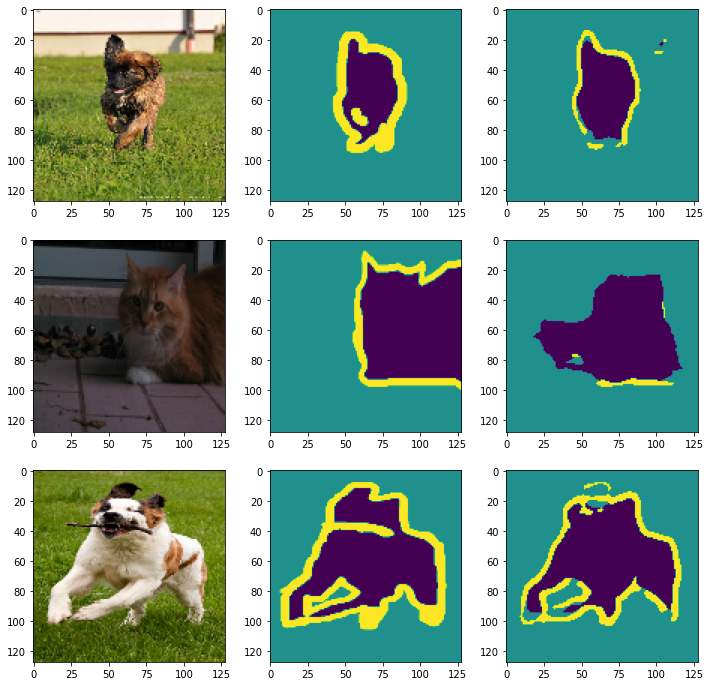

In [57]:
plt.figure(figsize=(12,12))

for idx, (img, mask) in enumerate(test_dataset.take(3)):
  plt.subplot(3,3, idx*3+1)
  plt.imshow(img[0])

  plt.subplot(3,3, idx*3+2)
  plt.imshow(np.squeeze(mask[0],axis=2))

  predict = tf.argmax(model.predict(img), axis=-1)
  plt.subplot(3,3, idx*3+3)
  plt.imshow(np.squeeze(predict, axis=0))

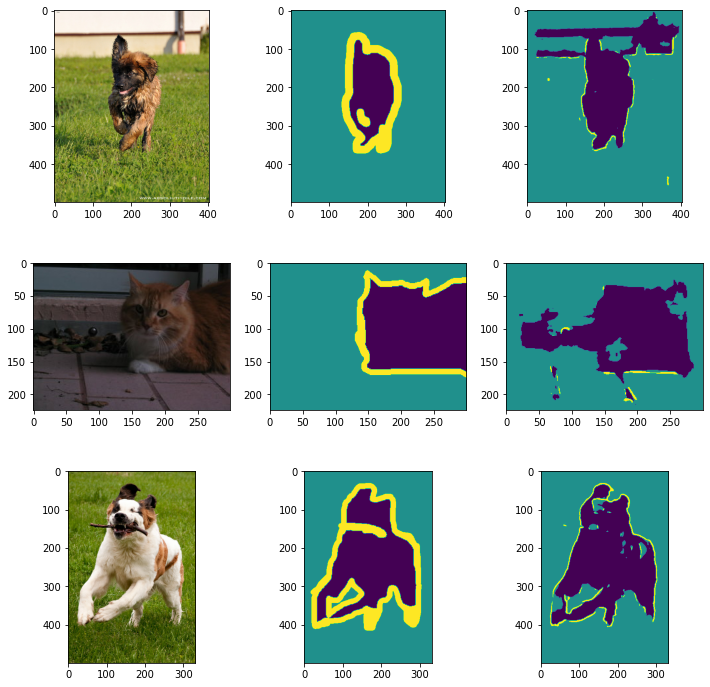

In [52]:
plt.figure(figsize=(12,12))

for idx, datapoint in enumerate(dataset['test'].take(3)):
  img = datapoint['image']
  mask = datapoint['segmentation_mask']

  img = tf.cast(img, tf.float32)
  img = img/255.0
  mask = mask - 1

  plt.subplot(3,3, idx*3+1)
  plt.imshow(img)

  plt.subplot(3,3, idx*3+2)
  plt.imshow(np.squeeze(mask, axis=2))

  predict = tf.argmax(model.predict(tf.expand_dims(img, axis=0)), axis=-1)
  plt.subplot(3,3, idx*3+3)
  plt.imshow(np.squeeze(predict, axis=0))